In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)   #reads the img as binary stringg
    img = tf.image.decode_image(img, channels=3, expand_animations=False)   #decodes into pixels and output is in RGB channel3
    img = tf.image.convert_image_dtype(img, tf.float32)  #converts pixels ui8(0-255 0 is black and 255 is white) to float32 It helps speed up training and stabilizes gradients.
    img = img[tf.newaxis, :]  #NN excepts (batch_size, height, width, channels)
    return img

In [4]:
content_image = load_image('man.jpg')
style_image = load_image('monet.jpeg')

In [5]:
content_image.shape    #tensorshape( batchsize, height, width , channel

TensorShape([1, 612, 408, 3])

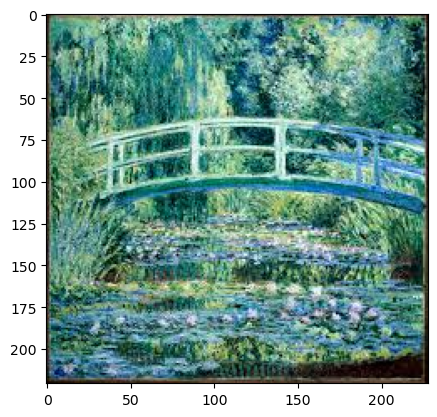

In [6]:
plt.imshow(np.squeeze(style_image))    #converts the image from (B,H,W,C) to (H,W,C)
plt.show()   #shoes the image

In [7]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))
#.constant means You're converting the NumPy/TF image tensors (content_image, style_image) to TensorFlow constants.


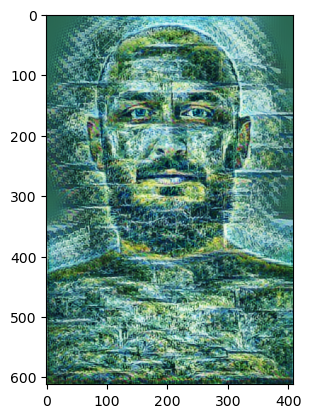

In [8]:
plt.imshow(np.squeeze(stylized_image))    #4d tensor to 3d which can be shown by pyplot easily & .imshow Displays the image in RGB format.
plt.show()

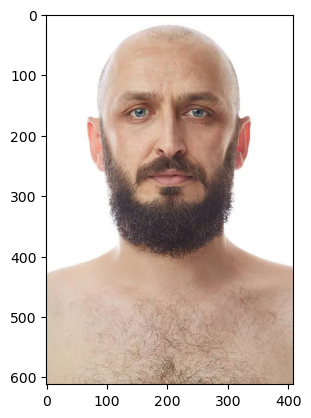

In [9]:
plt.imshow(np.squeeze(content_image)) 
plt.show()